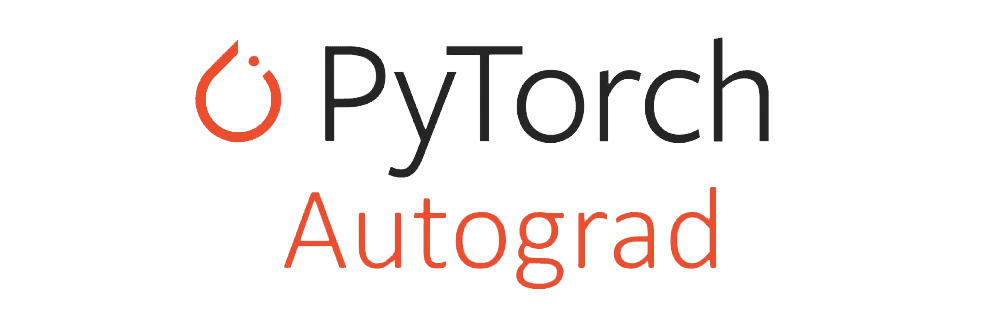

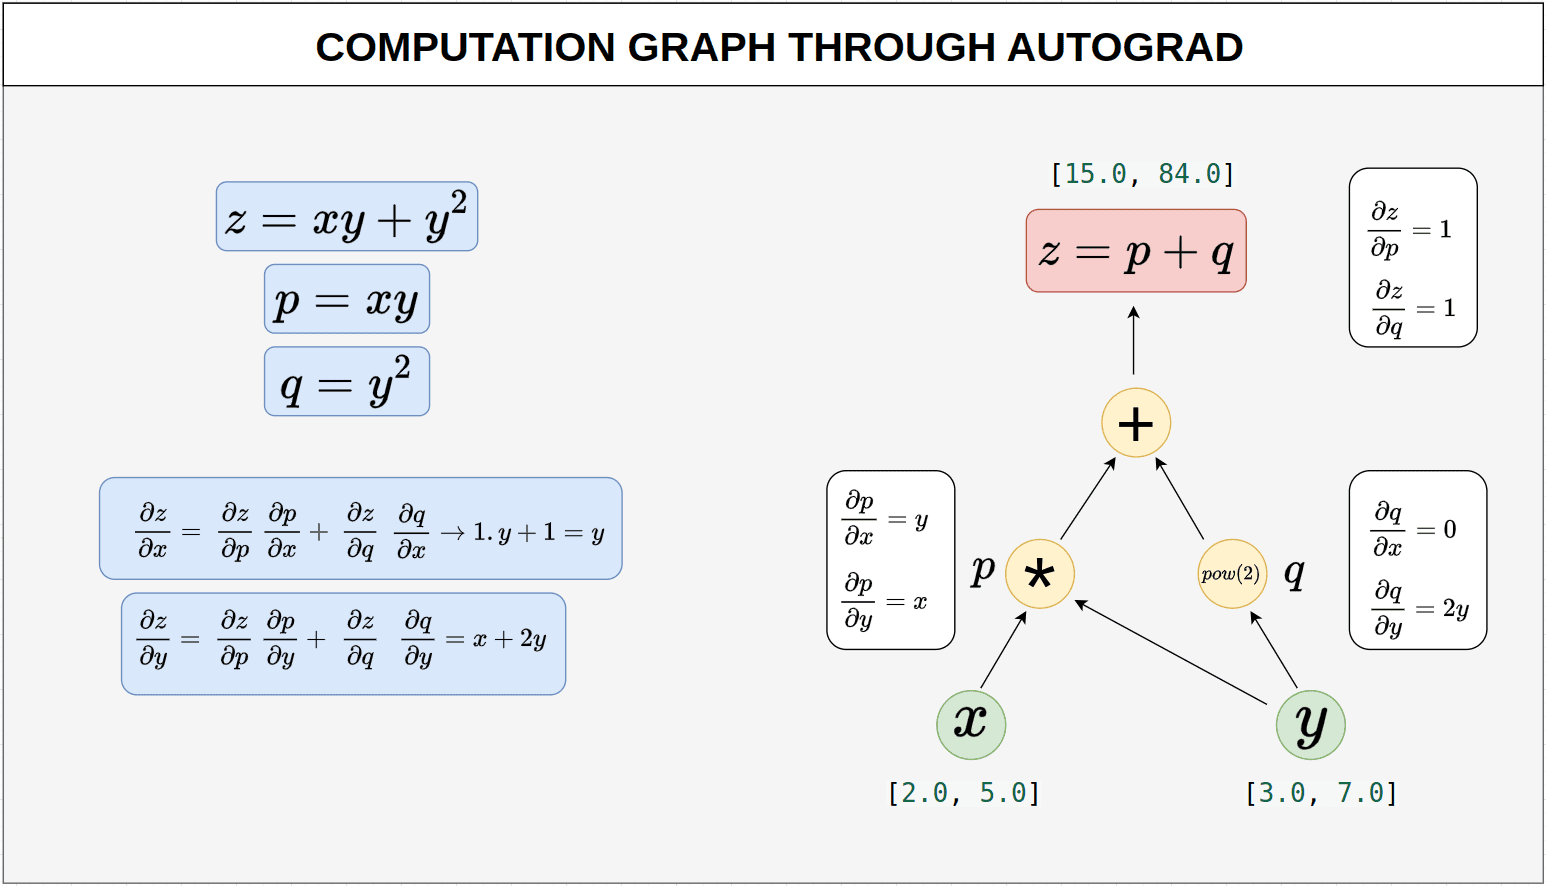

In [2]:
!pip install torchviz

In [4]:
import torch
import matplotlib.pyplot as plt
from torchviz import make_dot

In [5]:
x = torch.tensor([2.0, 5.0], requires_grad=True)
y = torch.tensor([3.0, 7.0], requires_grad=True)

In [6]:
z = x * y + y ** 2

z.retain_grad() # By default intermediate layer weight updation is not shown.

# Compute the gradients
z_sum = z.sum().backward()

print(f"Gradient of x: {x.grad}")
print(f"Gradient of y: {y.grad}")
print(f"Gradient of z: {z.grad}")
print(f"Result of the operation: z = {z.detach()}")

Gradient of x: tensor([3., 7.])
Gradient of y: tensor([ 8., 19.])
Gradient of z: tensor([1., 1.])
Result of the operation: z = tensor([15., 84.])


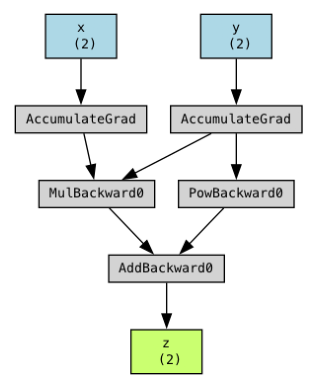

In [7]:
dot = make_dot(z, params={"x": x, "y": y, "z" : z})
dot.render("grad_computation_graph", format="png")

img = plt.imread("grad_computation_graph.png")
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
# Detaching Tensor from Computation Graph
print("Before detaching z from computation: ", z.requires_grad)
z_det = z.detach()
print("After detaching z from computation: ", z_det.requires_grad)

Before detaching z from computation:  True
After detaching z from computation:  False


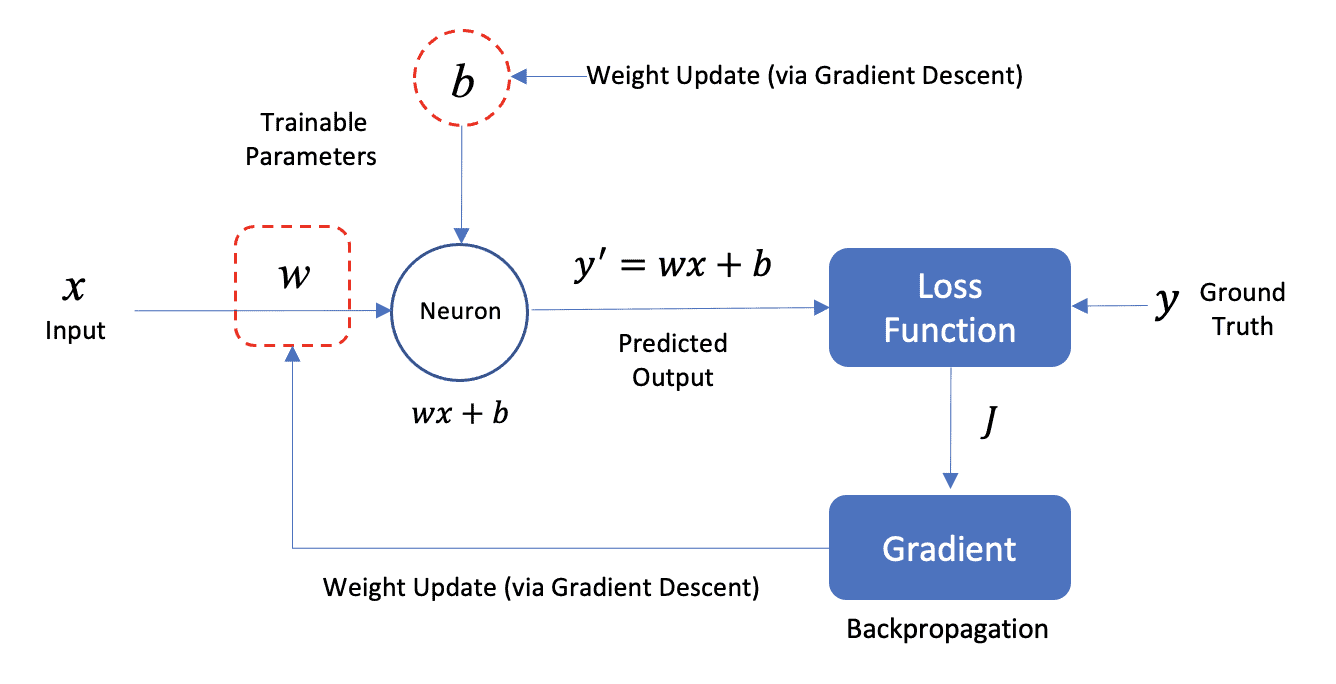